# Thailand Covid-19
#### ref: http://covid19.th-stat.com

### Driver code

In [1]:
import math
import pandas as pd
import requests
import plotly.graph_objs as go
from plotly.subplots import make_subplots

class Covid:
    def __init__(self):
        self.url = "http://covid19.th-stat.com/api/open/timeline"
    
    def __read_data(self, refresh=False):
        if not hasattr(self, 'data') or refresh:
            res = requests.get(self.url)
            data = res.json()['Data']
            last_update = res.json()['UpdateDate']
            self.data = pd.DataFrame(data)
            self.last_update = last_update
        return self.data, self.last_update

    def get_daily_cases(self):
        data, last_update = self.__read_data()
        daily_growth = data[['Date', 'Confirmed', 'Hospitalized', 'Recovered', 'Deaths']]
        confirmed = daily_growth['Confirmed']
        active = daily_growth['Hospitalized']
        recovered = daily_growth['Recovered']
        dead = daily_growth['Deaths']

        fig = go.Figure()
        fig.add_trace(go.Scatter(x=daily_growth['Date'], y=confirmed, name="Confirmed Cases", line_color="Blue"))
        fig.add_trace(go.Scatter(x=daily_growth['Date'], y=active, name="Active Cases", line_color="Pink"))
        fig.add_trace(go.Scatter(x=daily_growth['Date'], y=recovered, name="Total Recovered", line_color="Green"))
        fig.add_trace(go.Scatter(x=daily_growth['Date'], y=dead, name="Total Death", line_color="Red"))
        
        fig.update_layout(
            title_text="Covid-19 Daliy Analysis - Summary till date on Log scale, last updated: {}".format(last_update),
            spikedistance=200,
            hoverdistance=10,
            hovermode='x',
            xaxis = {
                "showspikes": True,
                "spikemode": "across",
                "spikecolor": "#000000",
                "spikethickness": 1
            },
            yaxis_type="log"
        )
        fig.show()
        
    def get_growth_rate(self):
        data, last_update = self.__read_data()
        daily_growth = data[['Date','NewConfirmed']]
        x_len = len(daily_growth)        
        g_rate = daily_growth['NewConfirmed'].shift(-1) / daily_growth['NewConfirmed']
        g_rate = g_rate.shift(periods=1, fill_value=0)
        fig = make_subplots(specs=[[{"secondary_y": True}]])

        fig.add_trace(
            go.Bar(x=daily_growth['Date'], y=g_rate, name="Growth Rate"),
            secondary_y=False,
        )

        fig.add_trace(
            go.Scatter(x=daily_growth['Date'], y=daily_growth['NewConfirmed'], name="New Confirmed Cases"),
            secondary_y=True,
        )

        fig.update_layout(
            title_text="Covid-19 Daliy Analysis - Growth Rate, last updated: {}".format(last_update),
            spikedistance=200,
            hoverdistance=10,
            hovermode='x',
            xaxis = {
                "showspikes": True,
                "spikemode": "across",
                "spikecolor": "Black",
                "spikethickness": 1
            },
            shapes= [
                dict(
                    type= 'line',
                    x0= 0,
                    y0= 1.0,
                    x1= x_len,
                    y1= 1.0,
                    line= dict(
                        color='Green',
                        width= 1,
                        dash= 'dashdot'
                    )
                )
            ]
        )

        fig.update_xaxes(title_text="Dates ->")

        fig.update_yaxes(title_text="Growth Rate ->", secondary_y=False)
        fig.update_yaxes(title_text="New Confirmed Cases ->", secondary_y=True)
        fig.show()
    
    def get_df(self):
        return self.__read_data()[0]
    
    def refresh(self):
        self.__read_data(True)

### Initialization - initialize just once

In [2]:
covid = Covid()

### Refreseh will reload the data from source
### you need to re-run the "Growth Rate and Daily cases" panel for latest update

In [13]:
covid.refresh()

### Growth Rate and Daily cases

In [14]:
covid.get_growth_rate()
covid.get_daily_cases()

### Summary

In [15]:
temp_df = covid.get_df()
latest_stats = temp_df.iloc[-1]
print("Recovered: {}%".format(100 * latest_stats['Recovered']/latest_stats['Confirmed']))
print("Deaths: {}%".format(100 * latest_stats['Deaths']/latest_stats['Confirmed']))

Recovered: 71.5974212034384%
Deaths: 1.683381088825215%


### Explore source data

In [16]:
temp_df

,Date,NewConfirmed,NewRecovered,NewHospitalized,NewDeaths,Confirmed,Recovered,Hospitalized,Deaths
0,01/01/2020,0,0,0,0,0,0,0,0
1,01/02/2020,0,0,0,0,0,0,0,0
2,01/03/2020,0,0,0,0,0,0,0,0
3,01/04/2020,0,0,0,0,0,0,0,0
4,01/05/2020,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
106,04/16/2020,29,96,-70,3,2672,1593,1033,46
107,04/17/2020,28,96,-69,1,2700,1689,964,47
108,04/18/2020,33,98,-65,0,2733,1787,899,47
109,04/19/2020,32,141,-109,0,2765,1928,790,47


In [17]:
temp_df[['Date', 'NewConfirmed', 'NewRecovered', 'NewDeaths']].tail(14)

,Date,NewConfirmed,NewRecovered,NewDeaths
97,04/07/2020,38,31,1
98,04/08/2020,111,64,3
99,04/09/2020,54,52,2
100,04/10/2020,50,73,1
101,04/11/2020,45,122,2
102,04/12/2020,33,83,3
103,04/13/2020,28,70,2
104,04/14/2020,34,117,1
105,04/15/2020,30,92,2
106,04/16/2020,29,96,3


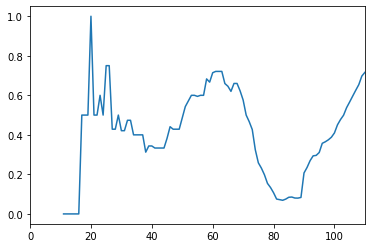

In [18]:
recover_ratio = temp_df['Recovered']/temp_df['Confirmed']
recover_ratio.plot()

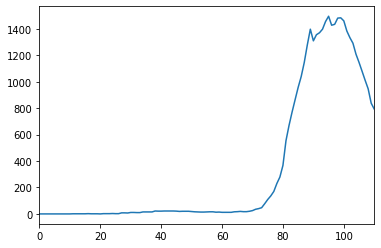

In [19]:
recover_diff = temp_df['Confirmed']-temp_df['Recovered']
recover_diff.plot()